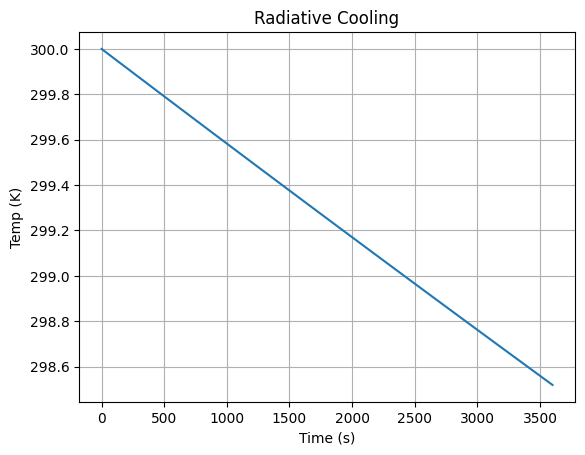

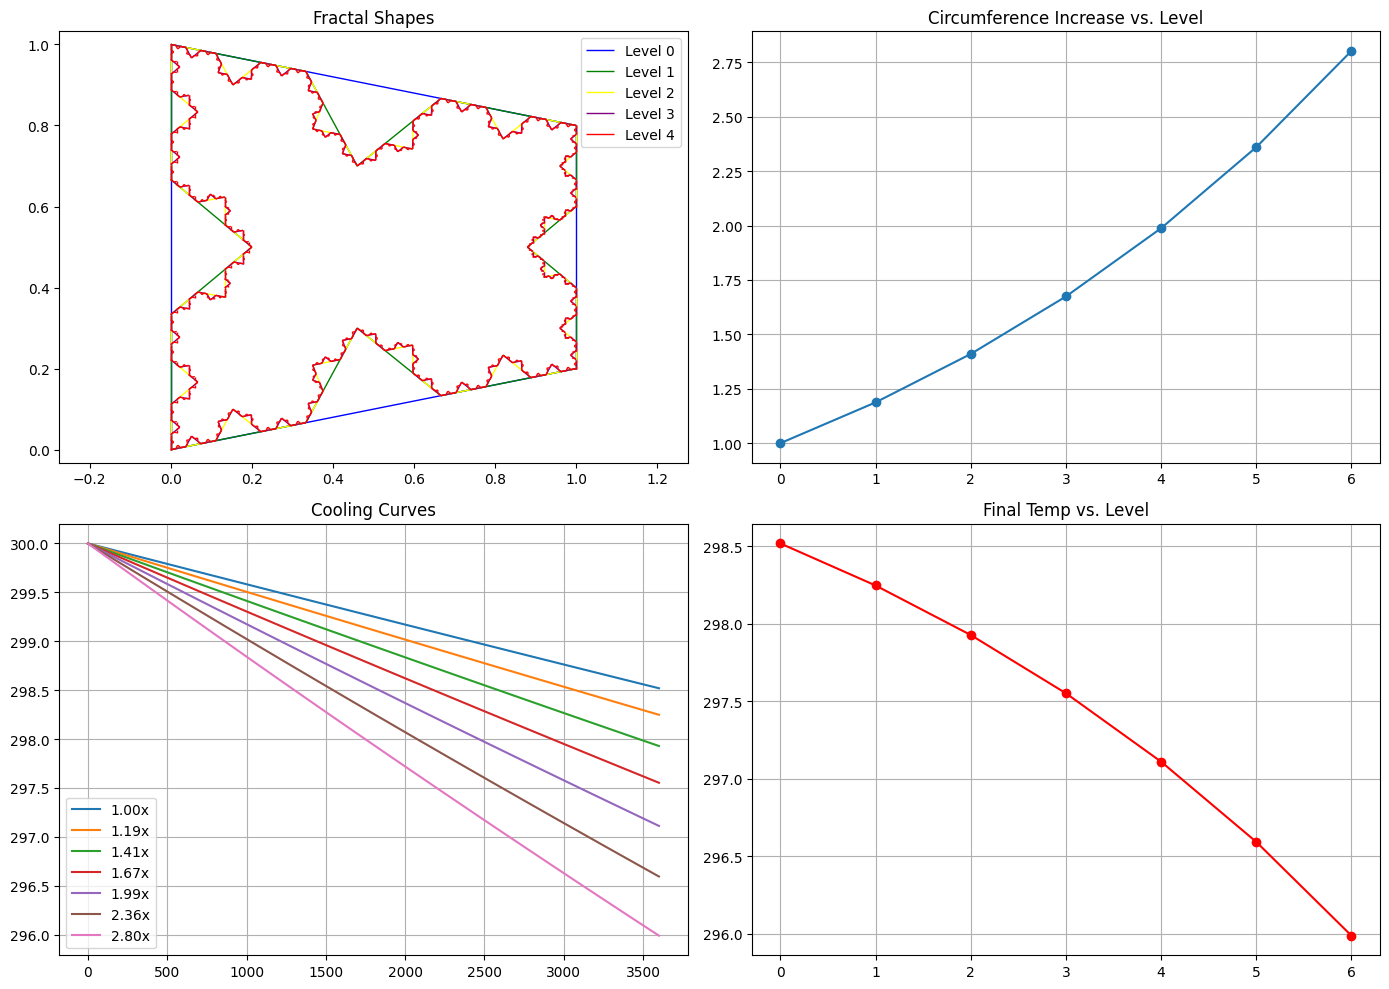

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.integrate import odeint

class ThermalFractalSim:
    def __init__(self):
        self.base = np.array([[0, 0], [1, 0.2], [0, 1], [1, 0.8]])

        # check those yself idk which one looks better same with u
        self.max_depth = 6 #can prob set it to less
        self.k = 1e-13 #anythin > -10 looks ok
        self.u_eq = 250 
        self.u0 = 300
        self.circumferences = []
        self.results = []

    def build_fractal(self, depth):
        sides = [self.base[[0,1]], self.base[[1,3]], self.base[[3,2]], self.base[[2,0]]]
        for _ in range(depth):
            temp = []
            for s in sides:
                a, b = s
                d = b - a
                seg1 = a + d / 3
                seg3 = a + 2 * d / 3
                perp = np.array([-d[1], d[0]])
                perp /= np.linalg.norm(perp)
                seg2 = (a + b)/2 + perp * np.linalg.norm(d)/3 * 0.6
                temp += [[a, seg1], [seg1, seg2], [seg2, seg3], [seg3, b]]
            sides = temp
        return sides

    def get_circumference(self, lines):
        return sum(np.linalg.norm(l[1] - l[0]) for l in lines)

    def cooling_eq(self, u, t, factor=1):
        return -self.k * factor * (u**4 - self.u_eq**4)

    def simulate(self, factor, T=3600, pts=100):
        t = np.linspace(0, T, pts)
        u = odeint(self.cooling_eq, self.u0, t, args=(factor,))
        return t, u

    def compare_levels(self):
        base_lines = self.build_fractal(0)
        base_circumference = self.get_circumference(base_lines)
        self.circumferences = [base_circumference]

        for lvl in range(1, self.max_depth + 1):
            lines = self.build_fractal(lvl)
            self.circumferences.append(self.get_circumference(lines))

        self.results = []
        for A in self.circumferences:
            f = A / base_circumference
            t, u = self.simulate(f)
            self.results.append((t, u, f))

    def plot_all(self):
        plt.figure(figsize=(14, 10))

        # Fractal examples
        plt.subplot(2, 2, 1)
        colors = ['blue', 'green', 'yellow', 'purple', 'red'] 
        for i in range(5): #again can be less cuz loos messybut idk
            lines = self.build_fractal(i)
            lc = LineCollection(lines, linewidths=1, label=f'Level {i}', colors=colors[i])
            plt.gca().add_collection(lc)
        plt.title('Fractal Shapes')
        plt.axis('equal')
        plt.legend()

        # Circumference
        plt.subplot(2, 2, 2)
        lvls = range(self.max_depth + 1)
        circumference_growth = [a / self.circumferences[0] for a in self.circumferences]
        plt.plot(lvls, circumference_growth, 'o-')
        plt.title('Circumference Increase vs. Level')
        plt.grid(True)

        # Cooling
        plt.subplot(2, 2, 3)
        for t, u, f in self.results:
            plt.plot(t, u, label=f'{f:.2f}x')
        plt.title('Cooling Curves')
        plt.legend()
        plt.grid(True)

        # End temps
        plt.subplot(2, 2, 4)
        end_temps = [u[-1][0] for _, u, _ in self.results]
        plt.plot(lvls, end_temps, 'r-o')
        plt.title('Final Temp vs. Level')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def show_equation(self):
        t = np.linspace(0, 3600, 100)
        u = odeint(self.cooling_eq, self.u0, t, args=(1,))
        plt.plot(t, u)
        plt.title('Radiative Cooling')
        plt.xlabel('Time (s)')
        plt.ylabel('Temp (K)')
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    sim = ThermalFractalSim()
    sim.show_equation()
    sim.compare_levels()
    sim.plot_all()
